# Hallucinogens 
Hallucinogens may cause people extreme psychological effects, such as specifically hallucinations, severe mood changes, and a distorted sense or reality. 
In the document, there are some some common hallucinogens to be discussed, including LSD, PCP, Peyote, Mescaline, Psilocybin and Ecstasy. Besides, it focuses on when people used first and the ages they were. 


In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [3]:
case_quest_data = dataset.ix[:,0:2].copy()
hallucinogens = dataset.ix[:,'LSD':'ECSREC'].copy() # hallucinogens dataset

In [4]:
hallucinogens.shape

(55268, 37)

In [5]:
#hallucinogens.head

* How many cases use the drug?
* What are their age range?
* How frequently they use it?
* Did they stop and go back to it?
* Are they planning to quit?

### 1. How many cases used the drug
There are many Hallucinogens discussed in the survey.
There are total 7275 cases using Hallucinogens.

Since there are several subclasses, we counted for each subclass. 
As you can see below, there are 47816 cases who never use hallucinogens and we have 4048 cases for Psilocybin,4040 cases for Ecstasy, 3647 cases for LSD, 1112 for ohter hallucinogens, 875 for MESCALINE, 
843 for PCP	and 843 for PEYOTE. 
* Therefore, the popular drugs in hallucinogens are Psilocybin, Ecstasy and LSD. 



*We ignore few cases which answers were "Yes LOGICALLY ASSIGNED","DON'T KNOW" and "REFUSED".*

In [6]:
#Count the total number using Hallucinogens
Num_UsedHallucinogens=hallucinogens.query('(LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1)').shape[0]

#Num_UsedHallucinogens.shape
#Count the number using diffirent type of Hallucinogens
Num_NeverUsedHallucinogens=hallucinogens.query('LSD ==91').shape[0]
Num_LSD=hallucinogens.query('LSD ==1').shape[0]
Num_PCP=hallucinogens.query('PCP ==1').shape[0]
Num_PEYOTE=hallucinogens.query('PCP ==1').shape[0]
Num_MESC=hallucinogens.query('MESC ==1').shape[0]
Num_PSILCY=hallucinogens.query('PSILCY ==1').shape[0]
Num_ECSTASY=hallucinogens.query('ECSTASY ==1').shape[0]
Num_HALNOLST=hallucinogens.query('HALNOLST ==1').shape[0]
Num__Hallucinogens =  {"Num":{"Num_UsedHallucinogens":Num_UsedHallucinogens,"NeverUsedHallucinogens":Num_NeverUsedHallucinogens, "LSD":Num_LSD ,"PCP":Num_PCP,"PEYOTE":Num_PEYOTE,"MESC":Num_MESC,"PSILCY":Num_PSILCY,"ECSTASY":Num_ECSTASY,"HALNOLST":Num_HALNOLST}}


DF_Num__Hallucinogens=pd.DataFrame(Num__Hallucinogens).sort_values('Num', ascending = False)
DF_Num__Hallucinogens



,Num
NeverUsedHallucinogens,47816
Num_UsedHallucinogens,7275
PSILCY,4048
ECSTASY,4040
LSD,3647
HALNOLST,1112
MESC,875
PCP,843
PEYOTE,843


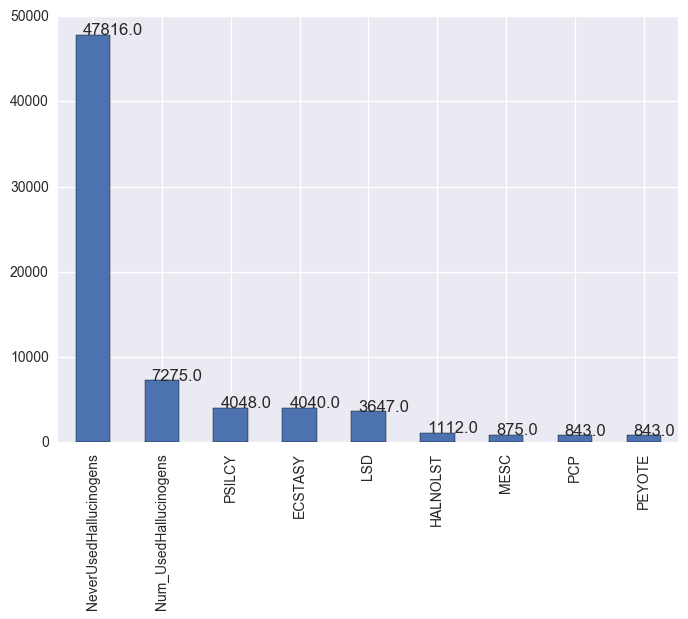

In [7]:
ax = DF_Num__Hallucinogens['Num'].plot.bar()

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

###  2.What are their age range?

In the first graph below, the most of cases used Hallucinogens between 13 and 22 years old, particularly when they are  17 years old.

We want to see if there any correlations between age and the year they started. 
Basically, they reached a peak between 2010, 2011 and 2012. 
For each year, the cases were focused on 17 years old. 
Besides, there are a lot of cases who started to use hallucinogens in 2011 and the age increase steadliy, which means the age and the use of Hallucinogens have a positive relationship.


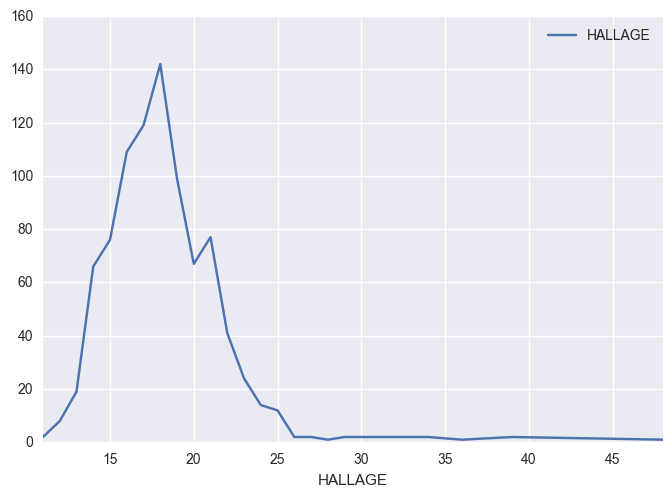

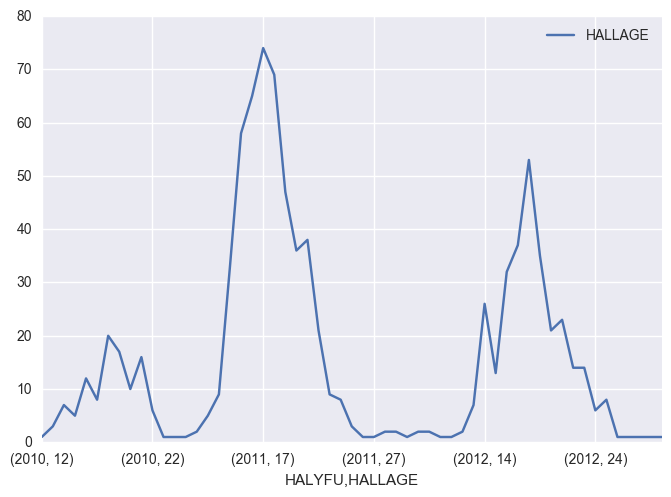

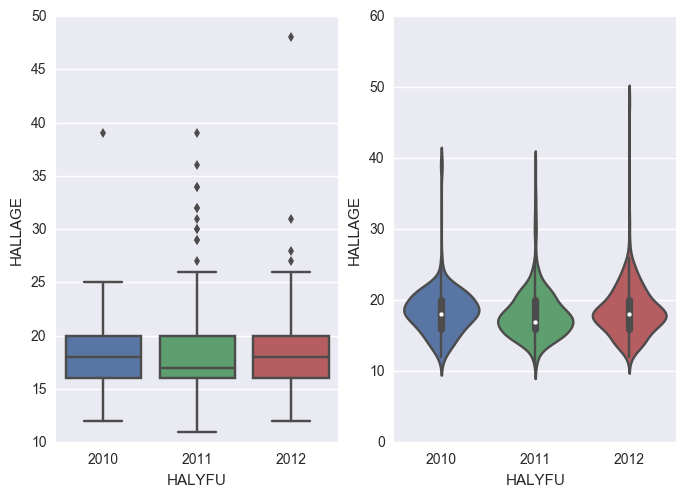

In [8]:
#query_data those who have used any one of the hallucinogens
hallucinogens1=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)&(HALYFU<=2013)')
count = hallucinogens1.groupby('HALLAGE').agg({ 'HALLAGE': 'count'})
count.plot()


# year & age
count_year = hallucinogens1.groupby(['HALYFU','HALLAGE']).agg({ 'HALLAGE': 'count'})
count_year.plot()
#count_year.plot(kind='scatter', x='HALYFU',y='HALLAGE')
hallucinogens1.plot(kind='scatter', x='HALYFU',y='HALLAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='HALYFU',y='HALLAGE',data=hallucinogens1)

plt.subplot(122)
sns.violinplot(x='HALYFU',y='HALLAGE',data=hallucinogens1)

### 3.How frequently they use it?
According to the survey, the easiest way to tell how frequently they used is in days per year. (HLBSTWAY)
As we can see below, the range is from 1 to 100 and the most of the cases use hallucinogens for 1 time per year.  
In addtion, the cases use the hallucinogens foucused below 5 timesd. 
But there are two gropus used hallucinogens about 9-12 times and 15-17 times per year. 
Overall, we can know that people are not very addicted to hallucinogens.

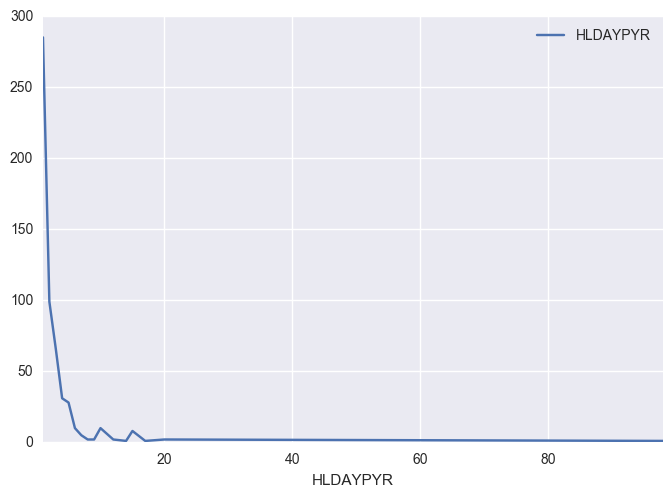

In [9]:
hallucinogens_fre=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)& (HLDAYPYR<985)')
count_days = hallucinogens_fre.groupby('HLDAYPYR').agg({ 'HLDAYPYR': 'count'})
count_days.plot()

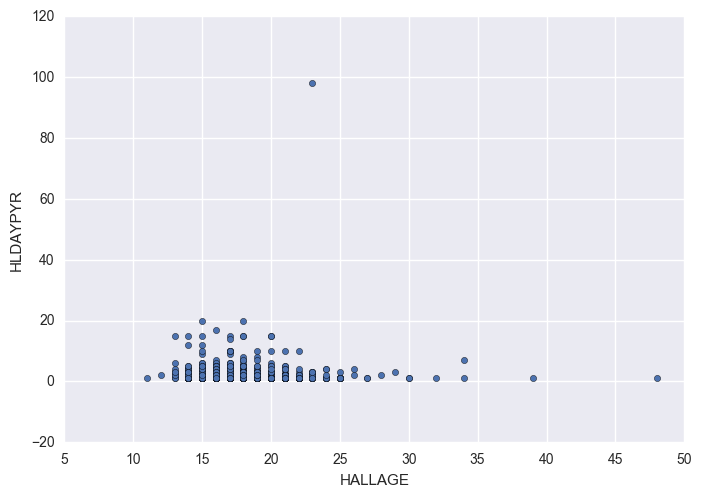

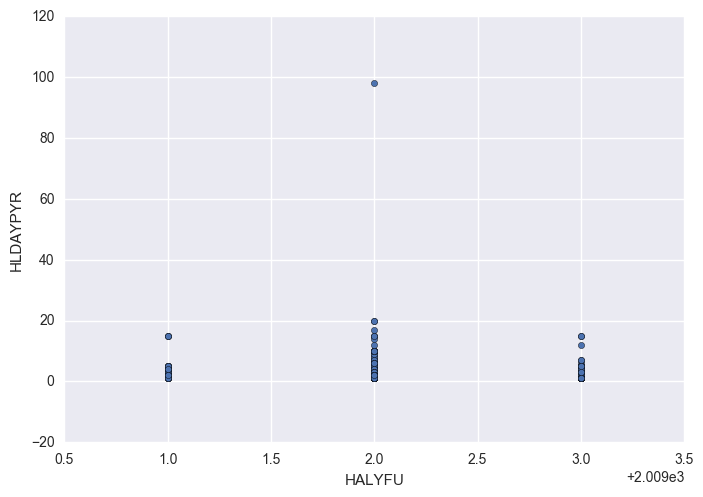

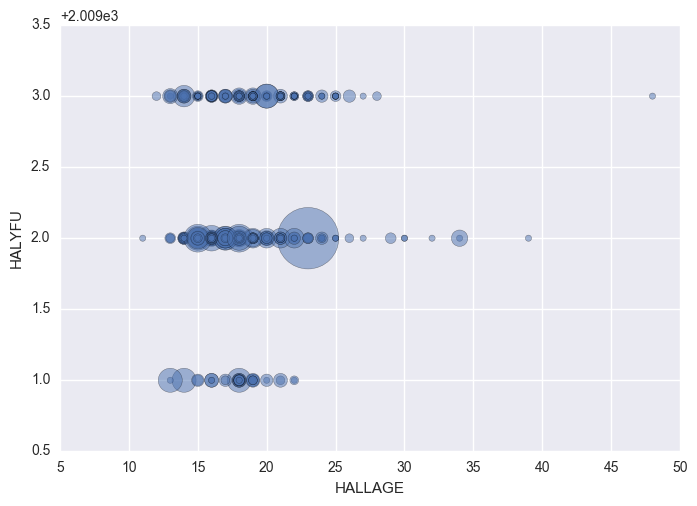

In [10]:
#hallucinogens_fre
hallucinogens_fre.plot(kind='scatter', x='HALLAGE',y='HLDAYPYR')
hallucinogens_fre.plot(kind='scatter', x='HALYFU',y='HLDAYPYR')
hallucinogens_fre.plot(kind='scatter', x='HALLAGE',y='HALYFU',s=hallucinogens_fre['HLDAYPYR']*20,alpha=0.5)

As we see above, we want to know the correlations of ages(HALLAGE), frequency(HALYFU) and the first year of the use(HLDAYPYR).

In the first graph, the plots are concentrated on the age of 13-23 and most of them uses the drug below 10 times. 
In the second graph, we have  frequency on x-axis and the first year of the use on y-axis. Most of the case are concertrated but there are few cases who used drug very frequently.
In the third graph,  we have age on x-axis , the first year of the use on y-axis and frequency on the scale.

### 4.Did they stop and go back to it? Are they planning to quit?

There are 5380 cases who quit the drug , 1210 cases who used the drug within the past 30 days and 420 cases who used the drug more than 30 days in the past year.

#HALLREC: the last time they used
#HALYRTOT: total days they used in past 12 years 

* 1 = Within the past 30 days 
* 2 = More than 30 days ago but within the past 12 months
* 3 = More than 12 months ago

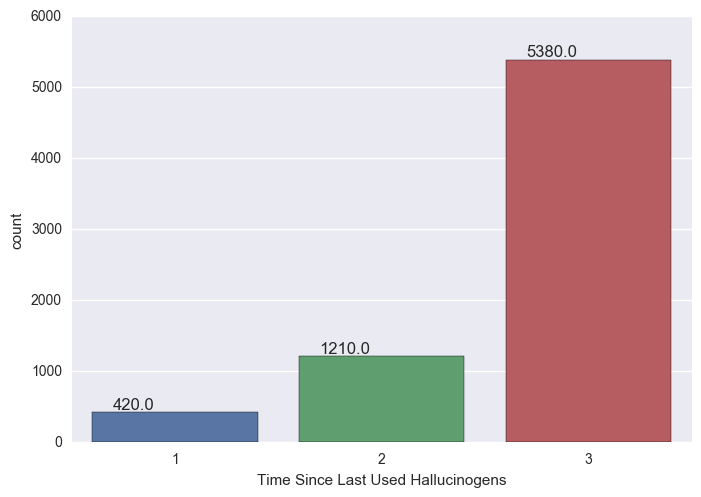

In [11]:
hallucinogens_quit=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&((HALYRTOT<=358)|(HALYRTOT==993))')
#hallucinogens_quit
#count_quit_days = hallucinogens_quit.groupby('HALYRTOT').agg({ 'HALYRTOT': 'count'})
#count_quit_days

lastUsed_hallucinogens = hallucinogens_quit.ix[(hallucinogens_quit['HALLREC'] < 4)].copy()
ax = sns.countplot(lastUsed_hallucinogens['HALLREC'])
plt.xlabel('Time Since Last Used Hallucinogens')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Those who went back are at a young age mostly. 

C:\Users\靜儀\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


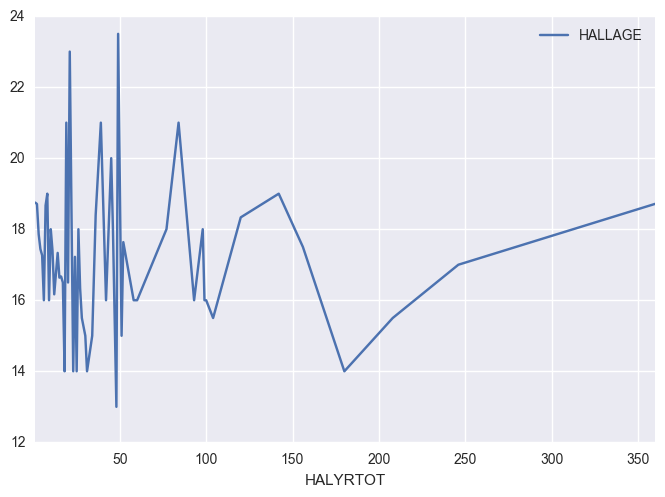

In [12]:
hallucinogens_quit2=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)& (HLDAYPYR<985)&((HALYRTOT<=358)|(HALYRTOT==993))')
hallucinogens_quit3=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&(HALLAGE <=69)& (HALYFU<=2012)&((HALYRTOT<=358)|(HALYRTOT==993))')
hallucinogens_quit1=hallucinogens.query('((LSD ==1)|(PSILCY ==1)|(ECSTASY ==1)|(HALNOLST ==1)|(MESC ==1)|(PCP ==1)|(PEYOTE ==1))&((HALYRTOT<=358)|(HALYRTOT==993))')
hallucinogens_quit3['HALYRTOT'] = hallucinogens_quit3.ix[:,'HALYRTOT'].replace(to_replace=993, value=360)
count_quit_days = hallucinogens_quit3.groupby('HALYRTOT').agg({ 'HALLAGE': 'mean'})
#count_quit_days

#count_quit_days = hallucinogens_quit3.groupby('HALYRTOT').agg({ 'HALYRTOT': 'count'})
count_quit_days.plot()
#hallucinogens_quit2.plot(kind='scatter', x='HALLAGE',y='HALYRTOT')
#hallucinogens_quit2.plot(kind='scatter', x='HALLAGE',y='HALYFU',c='HALYRTOT')

## Next

[Inhalants](Inhalants.ipynb)